# Atividade computacional 2
### Módulo 02
#### IMPLEMENTAÇÃO DE ESPECTROGRAMA E FUNÇÕES DE DETECÇÃO DE ONSET EM SINAIS DE ÁUDIO
Autor: Ariel Lima Andrade<br>

#### Importando bibliotecas 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft
import numpy as np
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

#### Minha caixa de ferramentas
Definição de funções genéricas.

In [ ]:
def plotAudioSignalTime(data, title, xlabel, ylabel, figsize, duration):
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    t = np.linspace(0., duration, data.shape[0])
    plt.plot(t, data[:])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plotODF(data, title, xlabel, ylabel, figsize):
    figure(num=None, figsize=figsize, dpi=100, facecolor='w', edgecolor='k')
    t = np.linspace(0., data.shape[0], data.shape[0])
    plt.plot(t, data[:], "blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Parte 1 - Plotagem dos espectrogramas
O espectrograma de um sinal é uma análise na frequência de um sinal dividido em pequenas janelas. Cada janela possui sua resposta em frequência, com isso conseguimos perceber a evolução das componentes de frequência deste sinal ao longo do tempo. O espectrograma é construído a partir da Transformada de Fourier de tempo curto (em inglês Short-time Fourier transform (STFT)). O resultado disso é um sinal com 3 dimensões: tempo, frequência e amplitude.<br>
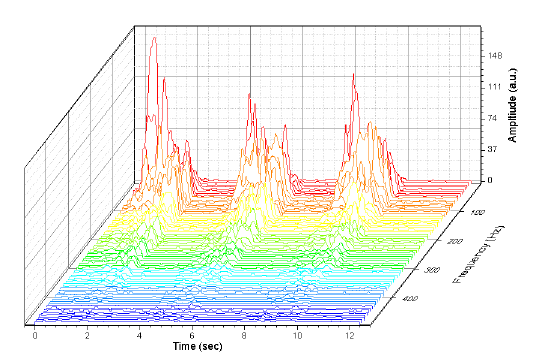<br>
Utilizaremos um gráfico em 2D para plotar o espectrograma, e em cada trecho de tempo a amplitude de cada frequência é representada pela intensidade da cor.

#### Reproduzindo o áudio 1 - Freesound ([Sad Violin and Orchestra](https://freesound.org/people/Cunningar0807/sounds/394288/))
Áudio disponível no Freesound.

In [ ]:
sound_file = './violin-and-orchestra.wav'
Audio(filename=sound_file, autoplay=False)

#### Carregando o áudio original em uma numpy array e convertendo de estéreo para mono

In [ ]:
samplerate, source_audio = wavfile.read(sound_file)
print(f"Sample rate do áudio: {samplerate}Hz")
print(f"Número de canais: {source_audio.shape[1]}")
duration = source_audio.shape[0] / samplerate
print(f"Duração do áudio: {duration}s")

# Convertendo o áudio de 2 canais em um único canal
source_audio_mono = np.array([(x[0] + x[1])//2 for x in source_audio], dtype=np.int16)

#### Plotando o espectrograma

In [ ]:
fs = samplerate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_mono, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio 1 - Sad Violin and Orchestra (Freesound) - Janela de Hanning ({window_size} amostras)")
plt.show()

figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio 1 - Sad Violin and Orchestra (Freesound) - Ampliado  - Janela de Hanning ({window_size} amostras)")
plt.ylim(0, 4000)
plt.show()

print("Reproduzir Sad Violin and Orchestra:")
Audio(filename=sound_file, autoplay=False)

#### Reproduzindo o áudio 2 - Trecho de Piano Sonata No. 16 (Sonata Facile) de Wolfgang Amadeus Mozart
Áudio gravado por mim utilizando um piano digital Casio CDP-120. O áudio foi capturado através da interface USB (MIDI) e sintetizado utilizando uma VST (Virtual Studio Technology) simulando o piano acústico Steinway D.

In [ ]:
sound_file = './sonata_facile.wav'
Audio(filename=sound_file, autoplay=False)

#### Carregando o áudio original em uma numpy array e convertendo de estéreo para mono

In [ ]:
samplerate, source_audio = wavfile.read(sound_file)
print(f"Sample rate do áudio: {samplerate}Hz")
print(f"Número de canais: {source_audio.shape[1]}")
duration = source_audio.shape[0] / samplerate
print(f"Duração do áudio: {duration}s")

# Convertendo o áudio de 2 canais em um único canal
source_audio_mono = np.array([(x[0] + x[1])//2 for x in source_audio], dtype=np.int16)

#### Plotando o espectrograma

In [ ]:
fs = samplerate
window_size = 1024
window_type = 'hann'

f, t, Sxx = signal.spectrogram(source_audio_mono, fs, nperseg=window_size, window=window_type)
figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio 2 - Sonata Facile - Janela de Hanning ({window_size} amostras)")
plt.show()

figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title(f"Espectrograma do áudio 2 - Sonata Facile - Ampliado  - Janela de Hanning ({window_size} amostras)")
plt.ylim(0, 3500)
plt.show()

figure(num=None, figsize=(20,5), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread("piano_roll_sonata_facile.png")
plt.axis('off')
plt.imshow(img)

print("Reproduzir Sonata Facile:")
Audio(filename=sound_file, autoplay=False)

Um detalhe interessante desta análise é que podemos notar o mesmo padrão do piano roll (teclas pressionadas ao longo do tempo) no espectrograma.

## Parte 2 - Funções de detecção de Onsets (ODF)
Os onsets de um sinal áudio estão relacionados aos pontos onde há mudanças de notas e eventos percurssivos. As funções de detecção de onset buscam esses pontos calculando diferenças entre os trechos da transformada de Fourier de tempo curto. O tamanho dos frames da STFT foram de $L_F = 256$ amostras. Neste estudo, utilizaremos três métodos:
- Método puramente energético ($ODF_E$)
$$ODF_E[n] = \sum_{k=1}^{L_F/2} ||X(n, k)|^2 - |X(n-1, k)|^2|$$
- Método do conteúdo de alta frequência ($ODF_{HFC}$)
$$ODF_{HFC}[n] = \frac{2}{L_F}\sum_{k=1}^{L_F/2} |k| \cdot |X(n, k)|^2$$
- Método da diferença espectral ($ODF_{SD}$)
$$ODF_{SD}[n] = \sum_{k=1}^{L_F/2} \{H[|X(n, k)| - |X(n - 1, k)|]\}^2$$
$$H[x] = \frac{x + |x|}{2}$$
<br>
Os frames foram multiplicados pela janela de Hanning e foram tomados com overlap de 50%.

#### Definindo método para cálculo das ODF

In [ ]:
def ODF(signal_input, ODF_type='E', window_size=256, overlap=0.5):
    
    if ODF_type == 'E':
        print("Método puramente energético\n")
    elif ODF_type == 'HFC':
        print("Método do conteúdo de alta frequência\n")
    elif ODF_type == 'SD':
        print("Método da diferença espectral\n")
    else:
        print(f"ERRO: {ODF_type} não é um método válido.\n")
        
    hann_window = np.reshape(np.array(signal.windows.hann(window_size)), (1, window_size)) # Convertendo em array vetor linha 
    overlap_size = window_size - int(window_size * overlap)
    framed_signal = np.zeros(((int(len(signal_input) / overlap_size) - 1, window_size))) # Criando uma matriz com o (total de frames, tamanho da janela)
    
    for i in range(framed_signal.shape[0]):
        framed_signal[i] = signal_input[overlap_size*i : overlap_size*i + 256]
   
    windowed_signal = framed_signal * hann_window # Multiplicação element-wise usando broadcast em hann_window

    stft =  np.zeros((framed_signal.shape[0], window_size//2))
    
    print(f"Shape da janela de hanning: {hann_window.shape}")
    print(f"Shape da matriz dos frames do sinal: {framed_signal.shape}")
    print(f"Shape do sinal janelado: {windowed_signal.shape}")
    print(f"Shape da STFT do sinal: {stft.shape}")
    
    for i in range(stft.shape[0]):
        stft[i] = (2/window_size) * fft(windowed_signal[i])[0:window_size//2]   
    
    def H_Rectifier(X):
        Y = (X + np.abs(X)) / 2.
        return Y
    
    if ODF_type == 'E':
        ODF = np.zeros((stft.shape[0],))
        for n in range(stft.shape[0]):
            for k in range(1, stft.shape[1]):
                    ODF[n] += np.abs(np.sum(np.power(np.abs(stft[n]), 2)) - np.sum(np.power(np.abs(stft[n-1]), 2)))
        return ODF
    elif ODF_type == 'HFC':
        ODF = np.zeros((stft.shape[0],))
        for n in range(stft.shape[0]):
            for k in range(1, stft.shape[1]):
                    ODF[n] += np.abs(k) * (np.abs(stft[n][k]) ** 2)
            ODF[n] = (2/stft.shape[1]) * ODF[n] # Multiplicando somatório por 2/Lf
        return ODF
    elif ODF_type == 'SD':
        ODF = np.zeros((stft.shape[0],))
        for n in range(1, stft.shape[0]):
            diff = (np.abs(stft[n]) - np.abs(stft[n - 1]))
            assert(diff.shape[0] == window_size//2)
            for k in range(1, stft.shape[1]):
                ODF[n] += H_Rectifier(diff[k]) **2
            
        return ODF

#### Reproduzindo o áudio 1 - Áudio de bateria gravado por Antônio C. L. Fernandes Jr.

In [ ]:
sound_file = './Audio_AC2/bat_jean_100bpm.wav'
Audio(filename=sound_file, autoplay=False)

#### Carregando o áudio original em uma numpy array e convertendo de estéreo para mono
Utilizaremos apenas as $2^{19}$ primeiras amostras do áudio.

In [ ]:
samplerate, source_audio = wavfile.read(sound_file)
print(f"Sample rate do áudio: {samplerate}Hz")
print(f"Número de canais: {source_audio.shape[1]}")
duration = source_audio.shape[0] / samplerate
print(f"Duração do áudio: {duration}s")

# Convertendo o áudio de 2 canais em um único canal (neste caso apenas removendo a coluna de um canal que não foi gravado)
source_audio_mono = np.delete(source_audio, 1, 1)
source_audio_mono = np.reshape(source_audio_mono, (source_audio_mono.shape[0],))
source_audio_mono = source_audio_mono[0:(2**19)] # Obtendo as 524288 primeiras amostras do áudio
duration = source_audio_mono.shape[0] / samplerate
print(f"\nDuração do áudio após o corte: {duration}s")
source_audio_mono = source_audio_mono / ((2**(16)) / 2) # Normalizando áudio com profundidade de 16 bits

In [ ]:
plotAudioSignalTime(source_audio_mono, "Sinal do áudio da bateria no domínio do tempo", "Tempo [s]", "Amplitude", (20, 5), duration)

ODF_E = ODF(source_audio_mono, ODF_type='E', window_size=256, overlap=0.5)
plotODF(ODF_E, "ODF - Método puramente energético", "Frames", "ODF", (20, 5))

ODF_HFC = ODF(source_audio_mono, ODF_type='HFC', window_size=256, overlap=0.5)
plotODF(ODF_HFC, "ODF - Método do conteúdo de alta frequência", "Frames", "ODF", (20, 5))

ODF_SD = ODF(source_audio_mono, ODF_type='SD', window_size=256, overlap=0.5)
plotODF(ODF_SD, "ODF - Método da diferença espectral", "Frames", "ODF", (20, 5))

#### Reproduzindo o áudio 2 - Áudio de violão gravado por Antônio C. L. Fernandes Jr.

In [ ]:
sound_file = './Audio_AC2/Only Sleeping100bpm(Violao).wav'
Audio(filename=sound_file, autoplay=False)

#### Carregando o áudio original em uma numpy array e convertendo de estéreo para mono
Utilizaremos apenas as $2^{19}$ primeiras amostras do áudio.

In [ ]:
samplerate, source_audio = wavfile.read(sound_file)
print(f"Sample rate do áudio: {samplerate}Hz")
print(f"Número de canais: {source_audio.shape[1]}")
duration = source_audio.shape[0] / samplerate
print(f"Duração do áudio: {duration}s")

# Convertendo o áudio de 2 canais em um único canal (neste caso apenas removendo a coluna de um canal que não foi gravado)
source_audio_mono = np.delete(source_audio, 0, 1)
source_audio_mono = np.reshape(source_audio_mono, (source_audio_mono.shape[0],))
source_audio_mono = source_audio_mono[0:(2**19)] # Obtendo as 524288 primeiras amostras do áudio
duration = source_audio_mono.shape[0] / samplerate
print(f"\nDuração do áudio após o corte: {duration}s")
source_audio_mono = source_audio_mono / ((2**(16)) / 2) # Normalizando áudio com profundidade de 16 bits

In [ ]:
plotAudioSignalTime(source_audio_mono, "Sinal do áudio do violão no domínio do tempo", "Tempo [s]", "Amplitude", (20, 5), duration)

ODF_E = ODF(source_audio_mono, ODF_type='E', window_size=256, overlap=0.5)
plotODF(ODF_E, "ODF - Método puramente energético", "Frames", "ODF", (20, 5))

ODF_HFC = ODF(source_audio_mono, ODF_type='HFC', window_size=256, overlap=0.5)
plotODF(ODF_HFC, "ODF - Método do conteúdo de alta frequência", "Frames", "ODF", (20, 5))

ODF_SD = ODF(source_audio_mono, ODF_type='SD', window_size=256, overlap=0.5)
plotODF(ODF_SD, "ODF - Método da diferença espectral", "Frames", "ODF", (20, 5))

#### Reproduzindo o áudio 3 - Áudio de gaita gravado por Antônio C. L. Fernandes Jr.

In [ ]:
sound_file = './Audio_AC2/GaitaTese.wav'
Audio(filename=sound_file, autoplay=False)

#### Carregando o áudio original em uma numpy array e convertendo de estéreo para mono
Utilizaremos apenas as $2^{19}$ primeiras amostras do áudio.

In [ ]:
samplerate, source_audio = wavfile.read(sound_file)
print(f"Sample rate do áudio: {samplerate}Hz")
print(f"Número de canais: {source_audio.shape[1]}")
duration = source_audio.shape[0] / samplerate
print(f"Duração do áudio: {duration}s")

# Convertendo o áudio de 2 canais em um único canal (neste caso apenas removendo a coluna de um canal que não foi gravado)
source_audio_mono = np.delete(source_audio, 0, 1)
source_audio_mono = np.reshape(source_audio_mono, (source_audio_mono.shape[0],))
source_audio_mono = source_audio_mono[int(samplerate*2.25):int(samplerate*2.25) + (2**19)] # Obtendo as 524288 primeiras amostras do áudio após silêncio

duration = source_audio_mono.shape[0] / samplerate
print(f"\nDuração do áudio após o corte: {duration}s")
source_audio_mono = source_audio_mono / ((2**(16)) / 2) # Normalizando áudio com profundidade de 16 bits

In [ ]:
plotAudioSignalTime(source_audio_mono, "Sinal do áudio da gaita no domínio do tempo", "Tempo [s]", "Amplitude", (20, 5), duration)

ODF_E = ODF(source_audio_mono, ODF_type='E', window_size=256, overlap=0.5)
plotODF(ODF_E, "ODF - Método puramente energético", "Frames", "ODF", (20, 5))

ODF_HFC = ODF(source_audio_mono/2, ODF_type='HFC', window_size=256, overlap=0.5)
plotODF(ODF_HFC, "ODF - Método do conteúdo de alta frequência", "Frames", "ODF", (20, 5))

ODF_SD = ODF(source_audio_mono/2, ODF_type='SD', window_size=256, overlap=0.5)
plotODF(ODF_SD, "ODF - Método da diferença espectral", "Frames", "ODF", (20, 5))